In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"D:\Stat TABA\Stat_Repeat\SleepQuality.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,PAL,Stress Level,BMIG,BP,HR,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [5]:
# NaN values in Sleep Disorder Column are actuallly 'None' values indicating no disorder.
#Rename NaN values to "No sleep disorder"

# Assuming df is your DataFrame
df['Sleep Disorder'] = df['Sleep Disorder'].fillna("No sleep disorder")


In [6]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,PAL,Stress Level,BMIG,BP,HR,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No sleep disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
print(df.dtypes)


Person ID             int64
Gender               object
Age                   int64
Occupation           object
Sleep Duration      float64
Quality of Sleep      int64
PAL                   int64
Stress Level          int64
BMIG                 object
BP                   object
HR                    int64
Daily Steps           int64
Sleep Disorder       object
dtype: object


In [8]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,PAL,Stress Level,BMIG,BP,HR,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No sleep disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
#figure no. 20 in report
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calculate mean, std, kurtosis, and skewness for numeric columns
means = numeric_columns.mean()
stds = numeric_columns.std()
kurt = numeric_columns.kurtosis()
skew = numeric_columns.skew()

# Create a summary DataFrame
des_df = pd.DataFrame({'Mean': means, 'Standard Deviation': stds, 'Kurtosis': kurt, 'Skewness': skew})

# Display the summary DataFrame
print(des_df)


                         Mean  Standard Deviation  Kurtosis  Skewness
Person ID          187.500000          108.108742 -1.200000  0.000000
Age                 42.184492            8.673133 -0.909780  0.257222
Sleep Duration       7.132086            0.795657 -1.286506  0.037554
Quality of Sleep     7.312834            1.196956 -0.748276 -0.207448
PAL                 59.171123           20.830804 -1.266068  0.074487
Stress Level         5.385027            1.774526 -1.327307  0.154330
HR                  70.165775            4.135676  2.286455  1.224824
Daily Steps       6816.844920         1617.915679 -0.394031  0.178277


## Descriptive Statistics

In [10]:
df.describe().round(3)

,Person ID,Age,Sleep Duration,Quality of Sleep,PAL,Stress Level,HR,Daily Steps
count,374.000,374.000,374.000,374.000,374.000,374.000,374.000,374.000
mean,187.500,42.184,7.132,7.313,59.171,5.385,70.166,6816.845
std,108.109,8.673,0.796,1.197,20.831,1.775,4.136,1617.916
min,1.000,27.000,5.800,4.000,30.000,3.000,65.000,3000.000
25%,94.250,35.250,6.400,6.000,45.000,4.000,68.000,5600.000
50%,187.500,43.000,7.200,7.000,60.000,5.000,70.000,7000.000
75%,280.750,50.000,7.800,8.000,75.000,7.000,72.000,8000.000
max,374.000,59.000,8.500,9.000,90.000,8.000,86.000,10000.000


In [11]:
df.isnull().sum()

Person ID           0
Gender              0
Age                 0
Occupation          0
Sleep Duration      0
Quality of Sleep    0
PAL                 0
Stress Level        0
BMIG                0
BP                  0
HR                  0
Daily Steps         0
Sleep Disorder      0
dtype: int64

In [12]:
df.dtypes

Person ID             int64
Gender               object
Age                   int64
Occupation           object
Sleep Duration      float64
Quality of Sleep      int64
PAL                   int64
Stress Level          int64
BMIG                 object
BP                   object
HR                    int64
Daily Steps           int64
Sleep Disorder       object
dtype: object

In [13]:
df.isna().sum()

Person ID           0
Gender              0
Age                 0
Occupation          0
Sleep Duration      0
Quality of Sleep    0
PAL                 0
Stress Level        0
BMIG                0
BP                  0
HR                  0
Daily Steps         0
Sleep Disorder      0
dtype: int64

# EDA

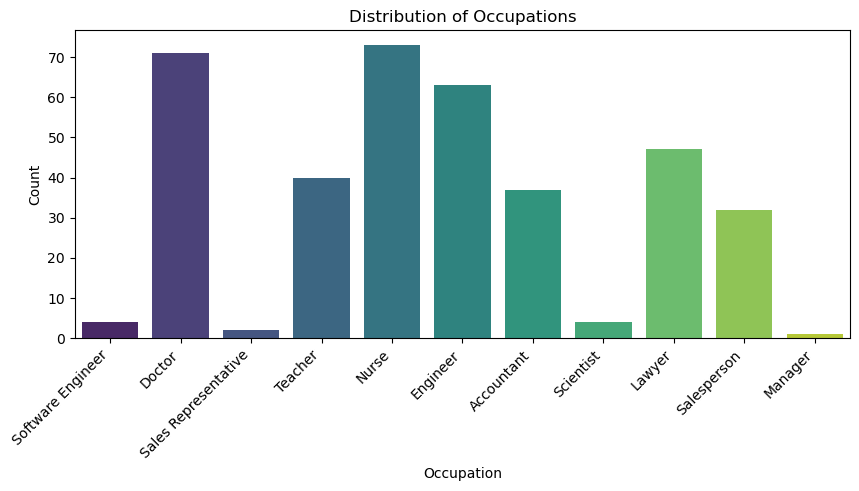

In [14]:
#figure no. 19 in report
# Create a countplot for the 'Occupation' variable
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Occupation', palette='viridis')
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_37628\4048849264.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Systolic_BP'].dropna(), kde=False, bins=30, color='blue')  # Adjust bins as needed


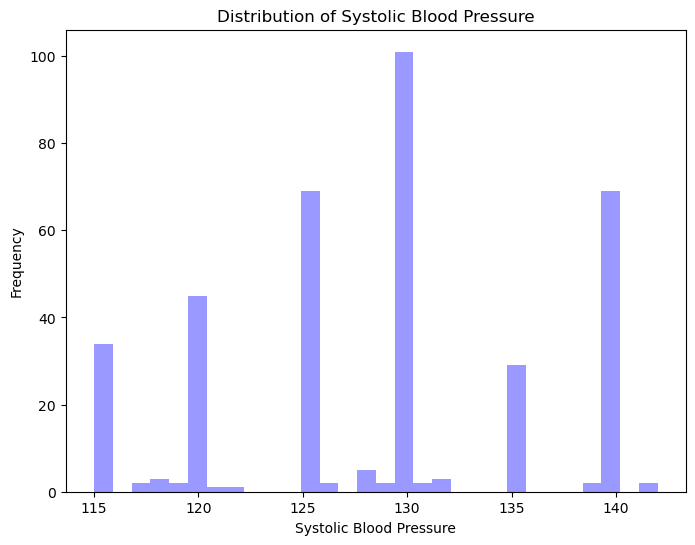

In [15]:
# Extract systolic blood pressure from the 'BP' column (assuming 'BP' is in the format 'systolic/diastolic')
df['Systolic_BP'] = df['BP'].apply(lambda x: int(x.split('/')[0]) if '/' in x else np.nan)

# Create a distribution plot for the 'Systolic_BP' variable
plt.figure(figsize=(8, 6))
sns.distplot(df['Systolic_BP'].dropna(), kde=False, bins=30, color='blue')  # Adjust bins as needed
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

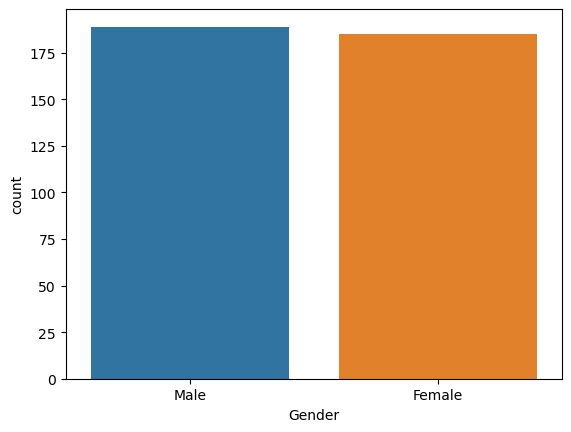

In [16]:
sns.countplot(x = 'Gender', data = df)

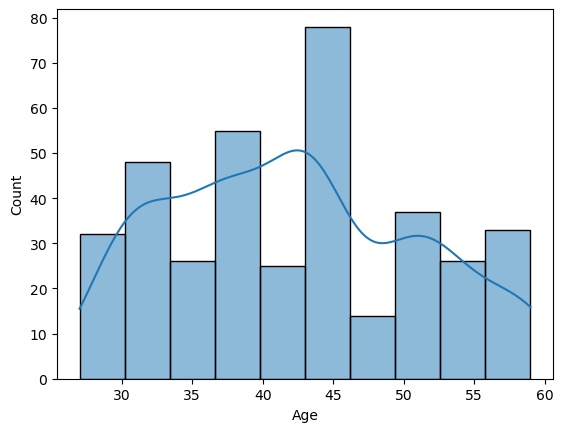

In [17]:
sns.histplot(data = df, x = 'Age', kde = 'True')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_37628\2982165881.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_37628\2982165881.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axes[i])
C:\Users\A

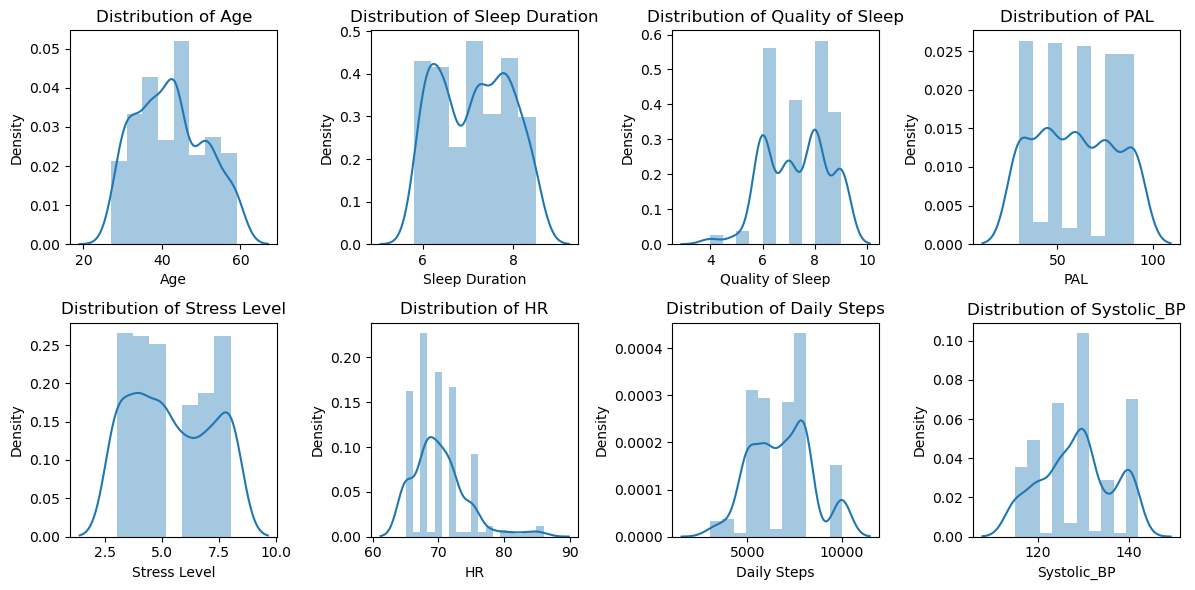

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

col_check = ['Age', 'Sleep Duration', 'Quality of Sleep', 'PAL', 'Stress Level', 'HR', 'Daily Steps','Systolic_BP']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
axes = axes.flatten()
# Plot each distribution
for i, col in enumerate(col_check):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


### Correlation analysis

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


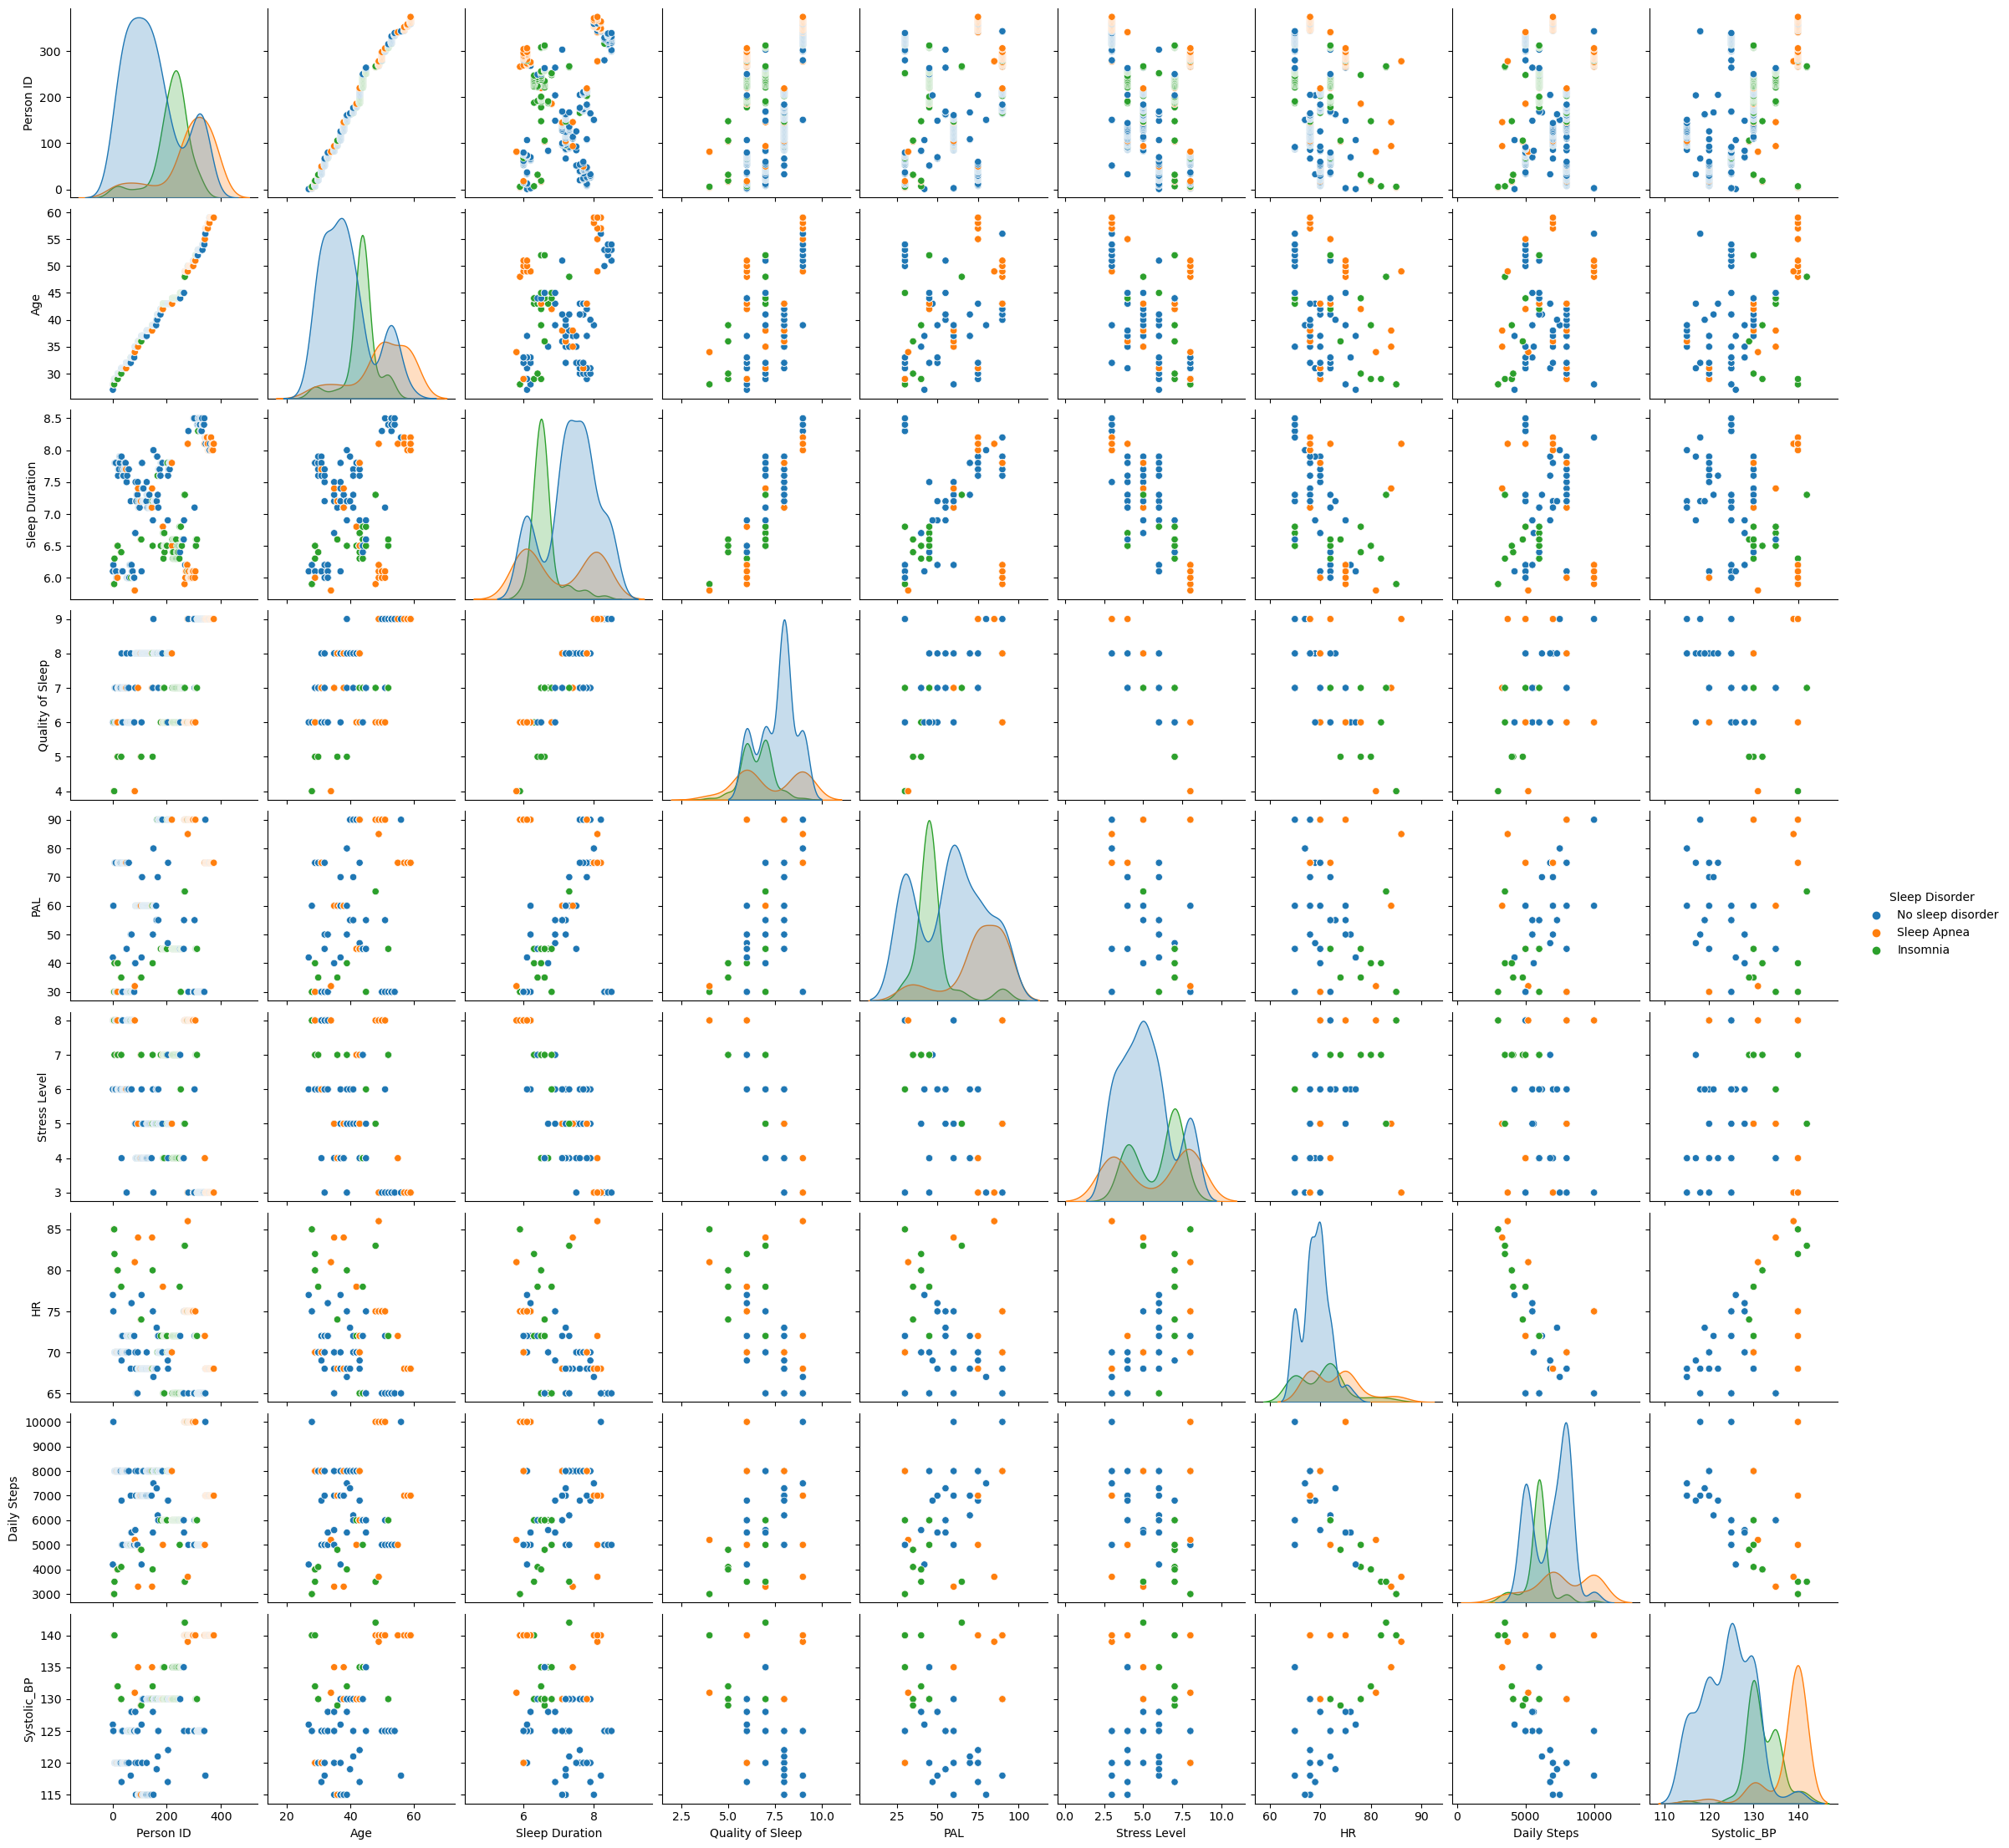

In [19]:
# Visualize the data
sns.pairplot(df, hue='Sleep Disorder')
plt.show()

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


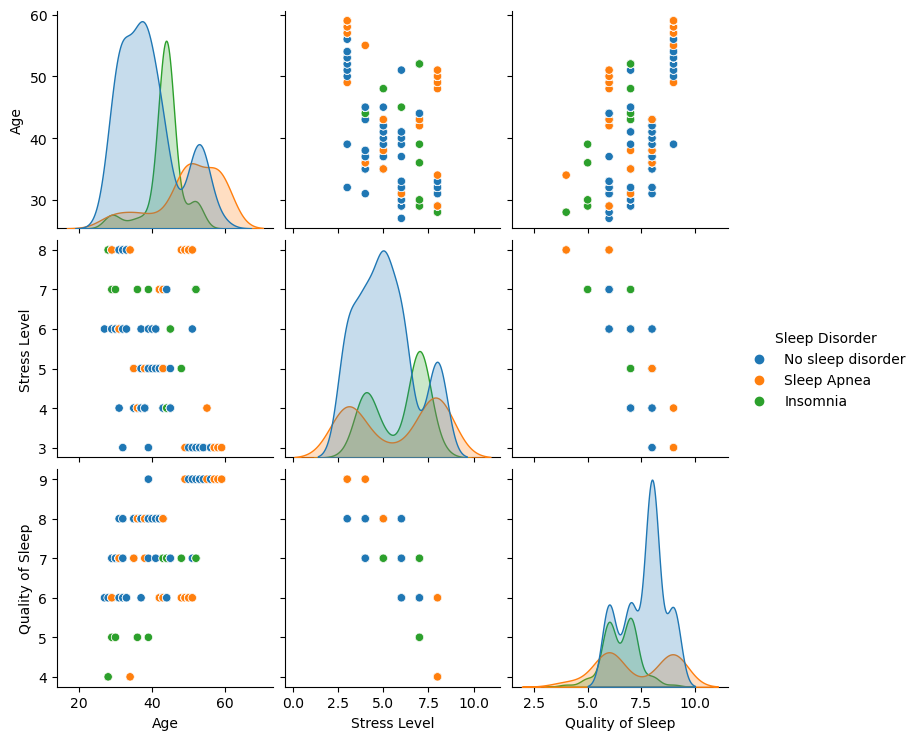

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
cols_of_interest = ['Age', 'Stress Level', 'Quality of Sleep', 'Sleep Disorder']
df_subset = df[cols_of_interest]

# Create pairplot
sns.pairplot(df_subset, hue='Sleep Disorder', diag_kind='kde')
plt.show()


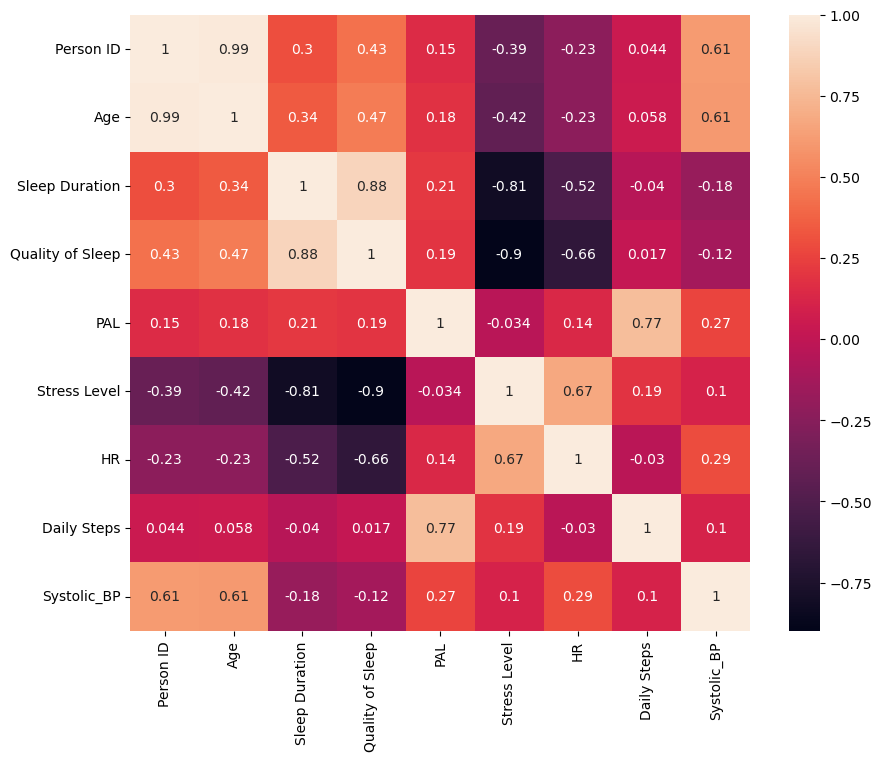

In [21]:
#figure no. 21
numeric_columns = df.select_dtypes(include=['int64','float64'])

# Create a heatmap of correlations for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()


### Data pre-processing

Treat Sleep Apnea and Insomnia as one level

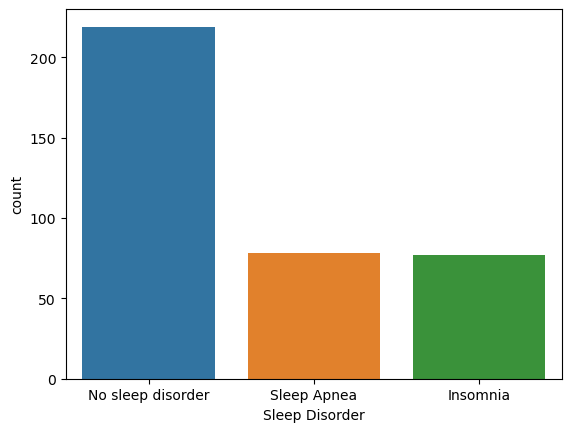

In [22]:
sns.countplot(x = 'Sleep Disorder', data = df)
plt.show()

In [23]:
# Assume Sleep Apnea and Insomnia are the same class
df['Sleep Disorder'] = df['Sleep Disorder'].replace({'Insomnia': 'Sleep Problems', 'Sleep Apnea': 'Sleep Problems'})

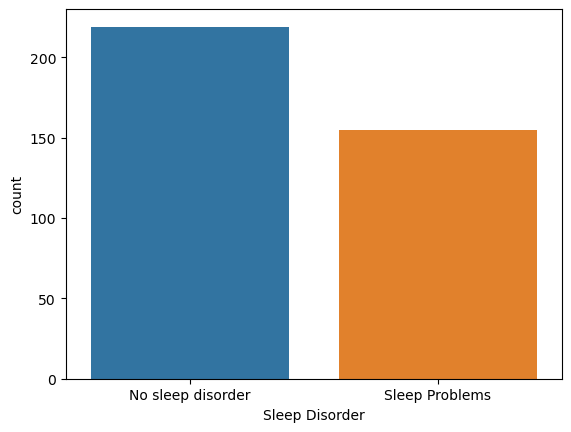

In [24]:
sns.countplot(x = 'Sleep Disorder', data = df)
plt.show()

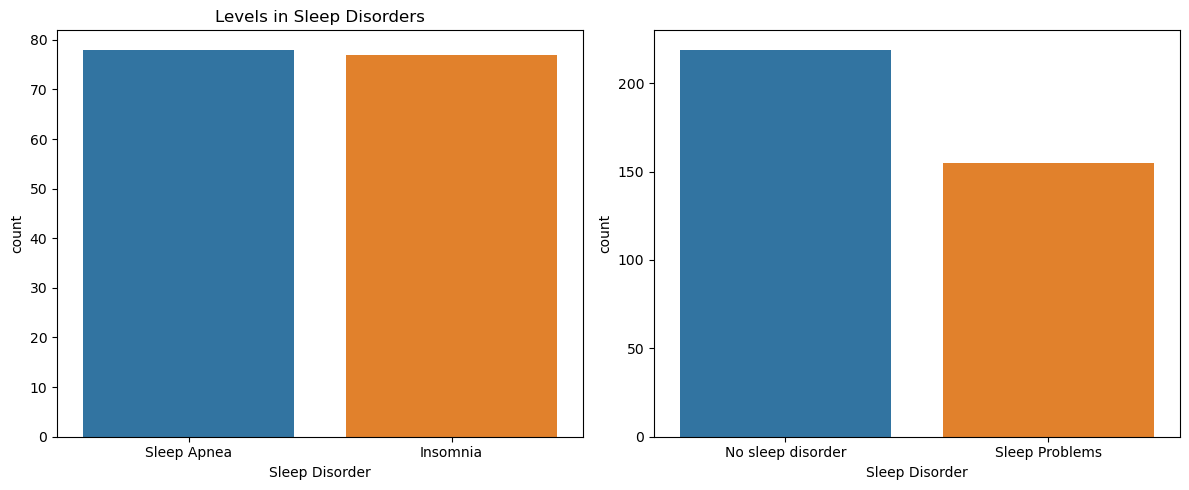

In [25]:
# only for report, figure no. 23

Df_for_plot = pd.read_csv(r"D:\Stat TABA\Stat_Repeat\SleepQuality.csv")
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the count plot in the first subplot
sns.countplot(x='Sleep Disorder', data=Df_for_plot, ax=axes[0])
axes[0].set_title('Levels in Sleep Disorders')

sns.countplot(x = 'Sleep Disorder', data = df)


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [26]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,PAL,Stress Level,BMIG,BP,HR,Daily Steps,Sleep Disorder,Systolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No sleep disorder,126
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder,125
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder,125
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Problems,140
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Problems,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140


In [27]:
bp_dtype = df['BP'].dtype

# Print the result
print(bp_dtype)

object


In [28]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,PAL,Stress Level,BMIG,BP,HR,Daily Steps,Sleep Disorder,Systolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No sleep disorder,126
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder,125
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder,125
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Problems,140
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Problems,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140


# check for outliers 

In [29]:
cols_of_interest = ['Age', 'Sleep Duration', 'Quality of Sleep', 'PAL', 'Stress Level', 'HR', 'Daily Steps','Systolic_BP']

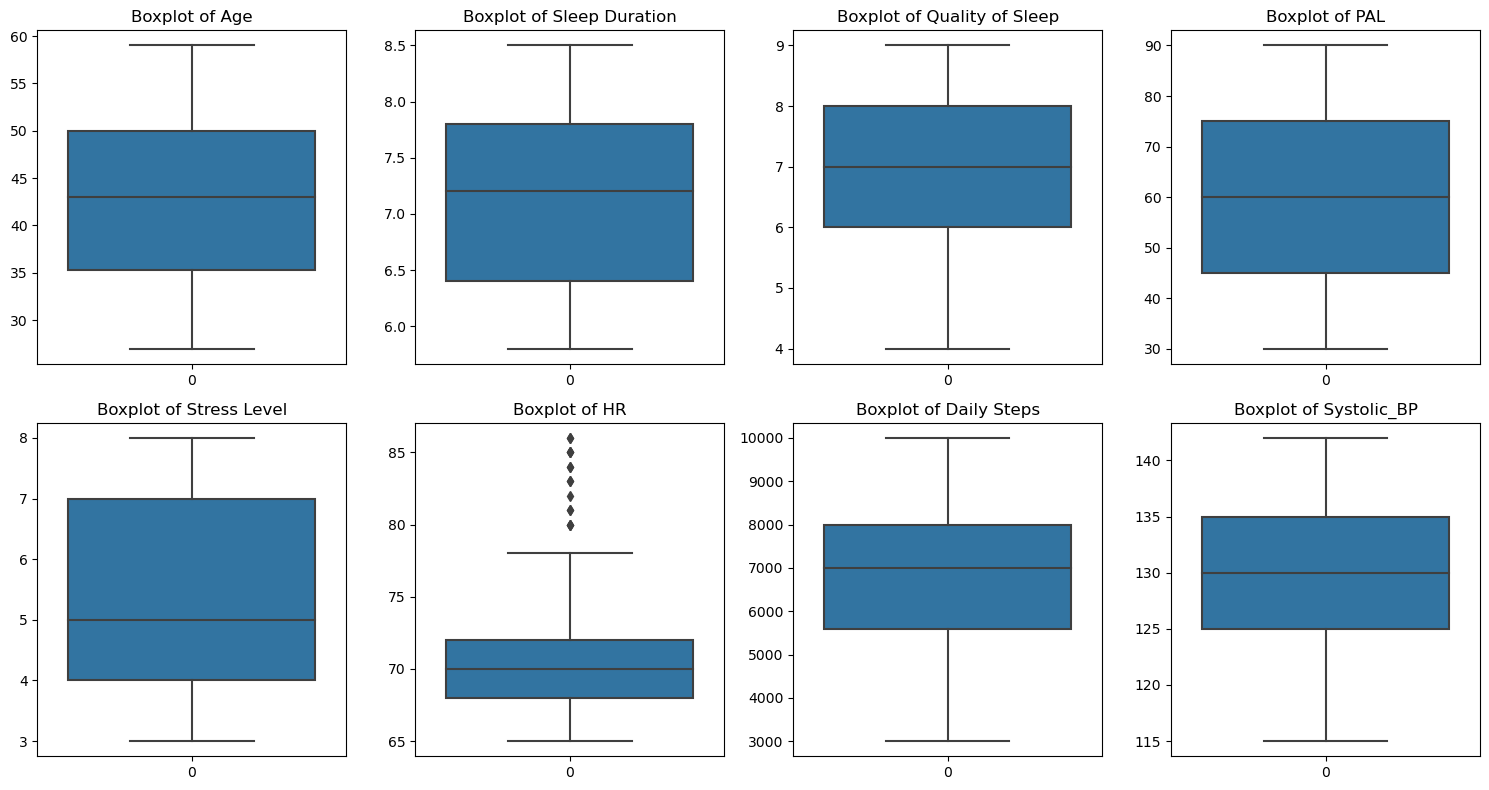

In [30]:
#Figure no 20
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cols_of_interest):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

    # Adjust layout
plt.tight_layout()
plt.show()

In [31]:
# Remove rows where 'HR' column values are greater than 85
df = df[df['HR'] <= 80]

# Verify the changes
print(df['HR'].describe()) 

count    362.000000
mean      69.715470
std        3.352633
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       80.000000
Name: HR, dtype: float64


In [32]:
#remove ouliers from "daily steps" column
#condition = (df['Daily Steps'] > 8000) | (df['Daily Steps'] < 4500)

# Create a new DataFrame containing rows that meet the condition
#filtered_df = df[condition]

# Remove the filtered rows from the original DataFrame
#df = df[~condition]

# Now, df contains rows where 'Daily Steps' is between 4500 and 8000, and filtered_df contains the rest


In [33]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,PAL,Stress Level,BMIG,BP,HR,Daily Steps,Sleep Disorder,Systolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No sleep disorder,126
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder,125
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No sleep disorder,125
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No sleep disorder,120
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No sleep disorder,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Problems,140


### Encoding of categorical variables

In [34]:
unique_occupations = df['Occupation'].unique()
print(unique_occupations)

['Software Engineer' 'Doctor' 'Nurse' 'Engineer' 'Accountant' 'Scientist'
 'Teacher' 'Lawyer' 'Salesperson' 'Manager']


In [35]:
from sklearn.preprocessing import OrdinalEncoder

# Create a mapping for occupation labels
occupation_mapping = {
    'Software Engineer': 1,
    'Doctor': 2,
    'Nurse': 3,
    'Engineer': 4,
    'Accountant': 5,
    'Scientist': 6,
    'Teacher': 7,
    'Lawyer': 8,
    'Salesperson': 9,
    'Manager': 10
}

# Apply ordinal encoding using sklearn
encoder = OrdinalEncoder(categories=[list(occupation_mapping.keys())])
df['Occupation_encoded'] = encoder.fit_transform(df[['Occupation']])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_37628\2396819043.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation_encoded'] = encoder.fit_transform(df[['Occupation']])


In [36]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to 'Gender'
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_37628\2156751088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender_encoded'] = le.fit_transform(df['Gender'])


In [37]:
# Apply one-hot encoding to 'BMIG' without dropping the first column
df = pd.get_dummies(df, columns=['BMIG'], prefix='BMIG')

In [38]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,PAL,Stress Level,BP,HR,Daily Steps,Sleep Disorder,Systolic_BP,Occupation_encoded,Gender_encoded,BMIG_Normal,BMIG_Normal Weight,BMIG_Overweight
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,No sleep disorder,126,0.0,1,False,False,True
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,No sleep disorder,125,1.0,1,True,False,False
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,No sleep disorder,125,1.0,1,True,False,False
7,8,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,No sleep disorder,120,1.0,1,True,False,False
8,9,Male,29,Doctor,7.8,7,75,6,120/80,70,8000,No sleep disorder,120,1.0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Problems,140,2.0,0,False,False,True
370,371,Female,59,Nurse,8.0,9,75,3,140/95,68,7000,Sleep Problems,140,2.0,0,False,False,True
371,372,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Problems,140,2.0,0,False,False,True
372,373,Female,59,Nurse,8.1,9,75,3,140/95,68,7000,Sleep Problems,140,2.0,0,False,False,True


### Model building

#### model 1

In [39]:
# Select all columns in X other than 'Sleep Disorder', 'Person ID' ,Gender,occupation,BMIG
X = df.drop(['Sleep Disorder', 'Person ID','Gender','Occupation','BP'], axis=1)

# Select the target variable
y = df['Sleep Disorder']

In [40]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Program Files\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

In [43]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[41  4]
 [ 5 23]]

Classification Report:
                    precision    recall  f1-score   support

No sleep disorder       0.89      0.91      0.90        45
   Sleep Problems       0.85      0.82      0.84        28

         accuracy                           0.88        73
        macro avg       0.87      0.87      0.87        73
     weighted avg       0.88      0.88      0.88        73



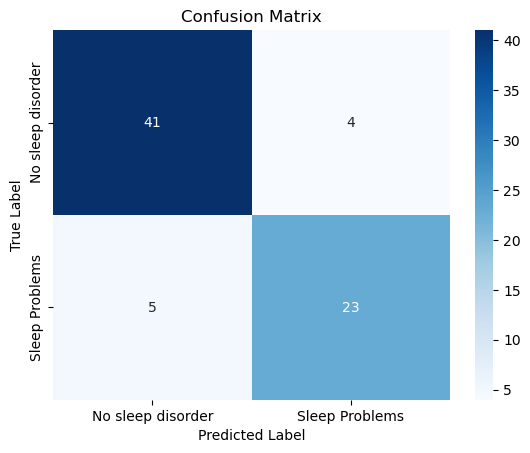

In [44]:
# Visualize the confusion matrix  ,figure no. 24 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Interpretation

Interpret the coefficients of the logistic regression model to understand the impact of each feature on the predicted outcome.

In [45]:
# Print the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -0.03161681527470911
Coefficients: [ 0.18983195 -0.6736397  -0.90898379  0.06435551  0.57558447 -0.25611981
 -0.001119    0.1578026   0.2077404  -0.1413023  -0.41437256  0.00893862
  0.37412744]


#### Model 2

Logistic regression is sensitive to the scale of input features.Lets Standardize numerical features to ensure that all features contribute equally to the model.

In [46]:
# Standardize features
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_standardized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_standardized = scaler.transform(X_test)

In [47]:
# Standardize the features (X)
#X_standardized = scaler.fit_transform(X)

In [48]:
# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train_standardized, y_train)

LogisticRegression()

In [49]:
# Predict on the test set
y_pred_standard = model.predict(X_test_standardized)

In [50]:
# Evaluate the model
conf_matrix1 = confusion_matrix(y_test, y_pred_standard)
class_report = classification_report(y_test, y_pred_standard)

print("Confusion Matrix:\n", conf_matrix1)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[39  6]
 [ 5 23]]

Classification Report:
                    precision    recall  f1-score   support

No sleep disorder       0.89      0.87      0.88        45
   Sleep Problems       0.79      0.82      0.81        28

         accuracy                           0.85        73
        macro avg       0.84      0.84      0.84        73
     weighted avg       0.85      0.85      0.85        73



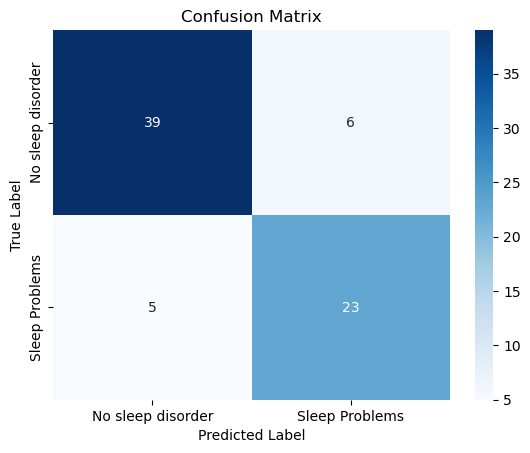

In [51]:
# Visualize the confusion matrix,figure no. 25
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Model 3

Hyperparameter tuning involves finding the optimal set of hyperparameters for machine learning model. One common method for hyperparameter tuning is grid search, where you specify a range of hyperparameter values, and the algorithm tests all possible combinations to find the best one.

In [52]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Specify hyperparameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Initialize the grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions on the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model with the best hyperparameters
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\Program Files\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
                   precision    recall  f1-score   support

No sleep disorder       0.89      0.91      0.90        45
   Sleep Problems       0.85      0.82      0.84        28

         accuracy                           0.88        73
        macro avg       0.87      0.87      0.87        73
     weighted avg       0.88      0.88      0.88        73



C:\Program Files\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Program Files\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

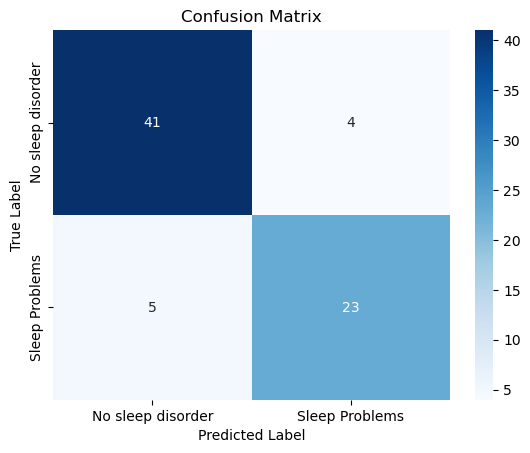

In [53]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Print the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -1.0118653155162274
Coefficients: [ 0.59279794 -0.12586732 -0.87452277  0.08547994 -0.04013079 -0.10097828
 -0.17955503  1.18881562  0.44601788 -0.21364498 -0.59185717  0.06362896
  0.57078125]
